In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

df = pd.read_csv("../../datasets/kc_house_price.txt", sep=",", header=0, index_col=None)

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


##### Data preprocessing (remove NaN, see distribution of data,...)

- Extract needed features 

In [35]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [36]:
LABEL_COLNAME = "price"

features = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
]

calculate_df = df.loc[:, [*features, LABEL_COLNAME]]

# Remove NaN
for col_name in features:
    calculate_df[col_name] = pd.to_numeric(
        calculate_df.loc[:, col_name], errors="coerce"
    )

calculate_df = calculate_df.dropna()
calculate_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,price
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,538000.0
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,180000.0
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,604000.0
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,510000.0
5,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,1230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,475000.0
21592,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,360000.0
21593,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,400000.0
21594,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,402101.0


- Reserve features with high relationship strength 

In [42]:
label_series = calculate_df[LABEL_COLNAME]
reserved_df = calculate_df[features]

for col_name in reserved_df.columns:
    correlate_coef = np.corrcoef(reserved_df[col_name], label_series)[0, 1]

    if correlate_coef < 0.6 or correlate_coef > 0.9:
        reserved_df = reserved_df.drop(col_name, axis=1)
        print("DROP", end=" ")
    else:
        print("OK", end=" ")

    print(col_name, correlate_coef)

features_df = reserved_df
features_df

SyntaxError: invalid syntax (785707292.py, line 7)

- Extract X and y

In [ ]:
X = reserved_df.to_numpy()
y = label_series.to_numpy()

X, y

(array([[2570,    7, 2170],
        [ 770,    6,  770],
        [1960,    7, 1050],
        ...,
        [2310,    8, 2310],
        [1020,    7, 1020],
        [1020,    7, 1020]]),
 array([538000., 180000., 604000., ..., 400000., 402101., 325000.]))

- Calculate solution using normal equation

In [ ]:
X_bar = np.insert(X, 0, values=1, axis=1)

A = X_bar.T @ X_bar
b = X_bar.T @ y
pinv_A = np.linalg.pinv(A)

w = pinv_A @ b
w

array([-6.54092589e+05,  2.38254930e+02,  1.09232469e+05, -7.66460456e+01])

- Display data onto graph

array([[   1, 2570,    7, 2170],
       [   1,  770,    6,  770],
       [   1, 1960,    7, 1050],
       ...,
       [   1, 2310,    8, 2310],
       [   1, 1020,    7, 1020],
       [   1, 1020,    7, 1020]])

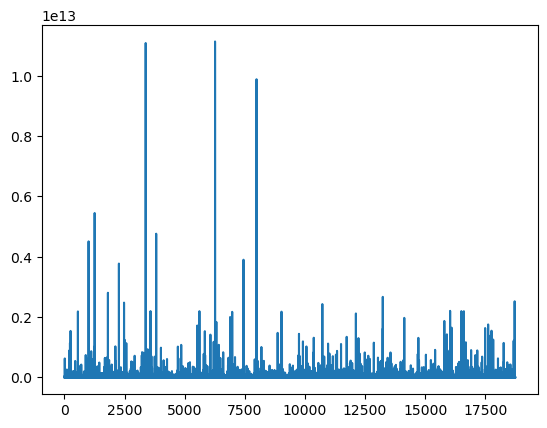

In [ ]:
y_pred = X_bar @ w
e = 0.5 * (y - y_pred) ** 2

mape = np.sum(np.abs(1 - y_pred / y)) / len(y)
mse = np.sum(e) / len(e)

plt.plot(e)
X_bar

- Test against library

In [ ]:
from sklearn import linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(
    fit_intercept=False
)  # fit_intercept = False for calculating the bias
regr.fit(X_bar, y)

# Compare two results
print("Solution found by scikit-learn:\n", regr.coef_)
print("Solution found by self:\n", w.T)

Solution found by scikit-learn:
 [-6.54092589e+05  2.38254930e+02  1.09232469e+05 -7.66460456e+01]
Solution found by self:
 [-6.54092589e+05  2.38254930e+02  1.09232469e+05 -7.66460456e+01]


In [ ]:
def grad(w):
    N = X_bar.shape[0]
    return 1 / N * X_bar.T.dot(X_bar.dot(w) - y)


def cost(w):
    N = X_bar.shape[0]
    return 0.5 / N * np.linalg.norm(y - X_bar.dot(w), 2) ** 2


def numerical_grad(w, cost):
    eps = 1e-5
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_l = w.copy()
        w_r = w.copy()
        w_l[i] -= eps
        w_r[i] += eps
        g[i] = (cost(w_r) - cost(w_l)) / (2 * eps)
    return g


def check_grad(w, cost, grad):
    # w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)

    return np.linalg.norm(grad1 - grad2) < 1e-6


print("Checking gradient...", check_grad(regr.coef_, cost, grad))

[*w.shape]

Checking gradient... False


[4]

In [ ]:
def myGD(w_init, grad, learning_rate, n_iterations=1000):
    w = [w_init]
    for it in range(n_iterations):
        w_new = w[-1] - learning_rate * grad(w[-1])
        # if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
        #     break
        w.append(w_new)
    return w, it


w_init = np.random.rand(w.shape[0])
ws_gd, it_gd = myGD(w_init, grad, learning_rate=0.1, n_iterations=10)

ws_gd

[array([0.4359949 , 0.02592623, 0.54966248, 0.43532239]),
 array([5.40787889e+04, 1.36762741e+08, 4.43474976e+05, 1.15736677e+08]),
 array([-4.92241433e+10, -1.21956131e+14, -3.97053614e+11, -1.05448253e+14]),
 array([4.42966795e+16, 1.09740489e+20, 3.57311256e+17, 9.49072527e+19]),
 array([-3.98635255e+22, -9.87577332e+25, -3.21552046e+23, -8.54091954e+25]),
 array([3.58740457e+28, 8.88742118e+31, 2.89371616e+29, 7.68615768e+31]),
 array([-3.22838269e+34, -7.99798187e+37, -2.60411754e+35, -6.91693897e+37]),
 array([2.90529117e+40, 7.19755627e+43, 2.34350150e+41, 6.22470246e+43]),
 array([-2.61453414e+46, -6.47723602e+49, -2.10896751e+47, -5.60174391e+49]),
 array([2.35287563e+52, 5.82900431e+55, 1.89790532e+53, 5.04113008e+55]),
 array([-2.11740349e+58, -5.24564661e+61, -1.70796591e+59, -4.53662161e+61])]